In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from matplotlib import pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import random
import math
import re

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams["axes.edgecolor"] = "black"

## Feature Engineering notebook

In [2]:
df = pd.read_csv('datasets/cleaned.csv')
df

,number,code,price,num_digits
0,1313,U,109000,4
1,3222,H,72000,4
2,30033,P,24000,5
3,7765,L,17500,4
4,8876,U,17500,4
...,...,...,...,...
2963,26277,U,2400,5
2964,28299,U,2400,5
2965,63383,U,2400,5
2966,93966,U,2400,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      2968 non-null   int64 
 1   code        2968 non-null   object
 2   price       2968 non-null   int64 
 3   num_digits  2968 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 92.9+ KB


### Extraction

In [4]:
# str helps extracting features easier
df['number'] = df['number'].astype(str)

# both capture pattern / lack of it 
df['unique_digits'] = df['number'].apply(lambda x: len(set(x)))
df['num_zeros'] = df['number'].apply(lambda x: x.count('0'))
df['max_group'] = df['number'].apply(lambda x: Counter(x).most_common(1)[0][1])
df['max_group_second'] = df['number'].apply(lambda x: Counter(x).most_common(2)[1][1])

df.head()

,number,code,price,num_digits,unique_digits,num_zeros,max_group,max_group_second
0,1313,U,109000,4,2,0,2,2
1,3222,H,72000,4,2,0,3,1
2,30033,P,24000,5,2,2,3,2
3,7765,L,17500,4,3,0,2,1
4,8876,U,17500,4,3,0,2,1


$H(X) = -\Large\sum_{i=1}^{n}P_{r}(x_{i})(log_{b}P_{r}(x_{i}))$

Is a measure of the amount of information in a string, I suppose it negatively correlates with price

In [5]:
def entropy(string):
    '''Calculates the Shannon entropy of a string'''
    
    prob = [ float(string.count(c)) / len(string) for c in dict.fromkeys(list(string)) ]
    return - sum(p * math.log(p) / math.log(2.0) for p in prob)

# Find H(X) for 'number' column
df['shan_entrop'] = df['number'].apply(entropy)

df.head()

,number,code,price,num_digits,unique_digits,num_zeros,max_group,max_group_second,shan_entrop
0,1313,U,109000,4,2,0,2,2,1.000000
1,3222,H,72000,4,2,0,3,1,0.811278
2,30033,P,24000,5,2,2,3,2,0.970951
3,7765,L,17500,4,3,0,2,1,1.500000
4,8876,U,17500,4,3,0,2,1,1.500000


In [6]:
# Set back to number 
df['number'] = df['number'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            2968 non-null   int32  
 1   code              2968 non-null   object 
 2   price             2968 non-null   int64  
 3   num_digits        2968 non-null   int64  
 4   unique_digits     2968 non-null   int64  
 5   num_zeros         2968 non-null   int64  
 6   max_group         2968 non-null   int64  
 7   max_group_second  2968 non-null   int64  
 8   shan_entrop       2968 non-null   float64
dtypes: float64(1), int32(1), int64(6), object(1)
memory usage: 197.2+ KB


### Dataviz of new features, sanity check

In [7]:
# Numeric columns only
df.select_dtypes(include = [np.number]).head()

,number,price,num_digits,unique_digits,num_zeros,max_group,max_group_second,shan_entrop
0,1313,109000,4,2,0,2,2,1.000000
1,3222,72000,4,2,0,3,1,0.811278
2,30033,24000,5,2,2,3,2,0.970951
3,7765,17500,4,3,0,2,1,1.500000
4,8876,17500,4,3,0,2,1,1.500000


In [8]:
# Keep numeric columns to apply transforms to later
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['number',
 'price',
 'num_digits',
 'unique_digits',
 'num_zeros',
 'max_group',
 'max_group_second',
 'shan_entrop']

<AxesSubplot:>

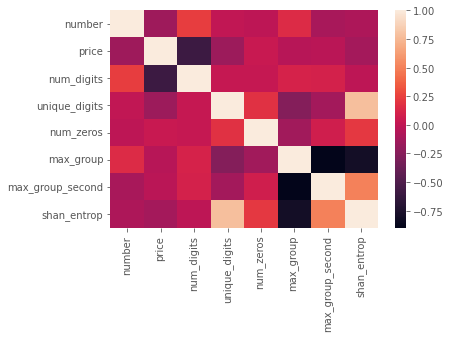

In [10]:
sns.heatmap(df.select_dtypes(include = np.number).corr())
# Doesn't seem like there is much of a correlation 
# However some strong anticorrelations 

In [13]:
# There is a chance that people like specific numbers 
# So num_x columns for all numbers might be good feature extraction
# There is a bias variance tradeoff, but given we have >2k samples, it should be passable

nums_list = ['ones','twos','threes',
             'fours','fives','sixes',
             'sevens','eights','nines']
num_dict = {word:str(num) for word,num\
            in zip(nums_list,range(1,10))}

for word,num in num_dict.items()
    df[f'num_{word}'] = df['number'].apply(lambda x: x.count(num))

{'ones': '1',
 'twos': '2',
 'threes': '3',
 'fours': '4',
 'fives': '5',
 'sixes': '6',
 'sevens': '7',
 'eights': '8',
 'nines': '9'}